 # Tema 8:  Neuronal Netword MLP
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        : MLP \\
  Termina      :
   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1:
 - Integrante 2:
 - Integrante 3:
 - Integrante 3:
 ----




In [49]:
import torch
import pandas as pd
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Base de datos.
For this practice, we have a lung cancer database with 310 records. Each record has 15 features, and the last column represents the class or label (YES = 1, NO = 0).

You should split the dataset into 70% for training and 30% for testing.

- Database [Here](https://docs.google.com/spreadsheets/d/1UgARjsg2BDeeJzcfPsydqFANqKHNOhXyVDoqL9_VIcc/edit?usp=sharing)

In [50]:
# Prepare Colab to work with CUDA.
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

# Read the dataset
path = "cancer.csv"
data = pd.read_csv(path)
data.head()

# Separar los datos en x y y
x_data = data.iloc[:, :15].copy()
y_data = data.iloc[:, -1].copy()

x_data["GENDER"] = x_data["GENDER"].apply(lambda x: 1 if x == "M" else 0)

y_data = y_data.apply(lambda x: 1 if x == "YES" else 0)

scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.int64)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)

cpu


# Neural Network Design

## Input:
- The input to the network is a vector of dimension 15. (Remember to normalize the data)
- You can use PCA or another method to reduce dimensionality and see the impact on the result

## Structure:

You should design 3 types of MLP:

- MLP with one hidden layer
- MLP with two hidden layers
- MLP with three hidden layers
- What should be the activation function of the output layer and why?

## Output:
- The network has 2 output neurons. (1,0) indicates **no cancer** and (0,1) indicates **cancer**.
- You should choose the activation function for the output layer according to the values it should return.

----
## Help Link:
- [Torch Linear Model](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
- [Examples](https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html)
- [Activation Functions](https://pytorch.org/docs/stable/nn.functional.html)



In [51]:
class MLP1(nn.Module):
    def __init__(self, n):
        super(MLP1, self).__init__()
        self.layer_1 = nn.Sequential(
            nn.Linear(15, n),
            nn.ReLU(),
            nn.Linear(n, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        output = self.layer_1(x)
        return output

class MLP2(nn.Module):
    def __init__(self, n):
        super(MLP2, self).__init__()
        self.layer_1 = nn.Sequential(
            nn.Linear(15, n),
            nn.ReLU(),
            nn.Linear(n, n),
            nn.ReLU(),
            nn.Linear(n, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        output = self.layer_1(x)
        return output

class MLP3(nn.Module):
    def __init__(self, n):
        super(MLP3, self).__init__()
        self.layer_1 = nn.Sequential(
            nn.Linear(15, n),
            nn.ReLU(),
            nn.Linear(n, n),
            nn.ReLU(),
            nn.Linear(n, n),
            nn.ReLU(),
            nn.Linear(n, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        output = self.layer_1(x)
        return output



# Loss Function and Optimizer
For each MLP, you should create its loss function and optimizer.
- Keep in mind that the output of the network is a vector with two values, each value between zero and one. For example, the output might be (0.92, 0.08), which indicates that the patient has a 92% probability of not having cancer and an 8% probability of having cancer.

- Given this information, consider what would be the appropriate loss function. No, it is not MSE.

----

- [Loss Function](https://neptune.ai/blog/pytorch-loss-functions)
- [Optimizers](https://machinelearningmastery.com/using-optimizers-from-pytorch/)

In [52]:
# The following two lines are examples of a loss function and an optimizer.

model1 = MLP1(10)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr = 0.01)

model2 = MLP2(10)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr = 0.01)

model3 = MLP3(10)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr = 0.01)

# Training

- In this stage, you should train your neural network.
- The training code is already prepared to work for you.

In [53]:
def train(model, loss_f, optimizer,epochs, x_train, y_train):
  loss_lista = []
  i=0
  for epoch in range(epochs):

    x_train = x_train.to(device)
    y_train = y_train.to(device)

    # Propagacion adelante
    y_pred = model(x_train)
    loss   = loss_f(y_pred,y_train)
    loss_lista.append(loss.cpu())
    i=i+1
    if (epoch%500==0):
      print('Epoch {}: train loss: {}'.format(epoch, loss.item()))    # Backward pass

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  return loss_lista

# Testing
- Complete the test function so that you can find the accuracy of the model, plot the confusion matrix, and display metrics such as F1-score, precision, and recall.

Epoch 0: train loss: 0.7638800144195557
Epoch 500: train loss: 0.7638800144195557
Epoch 0: train loss: 0.7148492336273193
Epoch 500: train loss: 0.7148492336273193
Epoch 0: train loss: 0.3509366810321808
Epoch 500: train loss: 0.35031959414482117


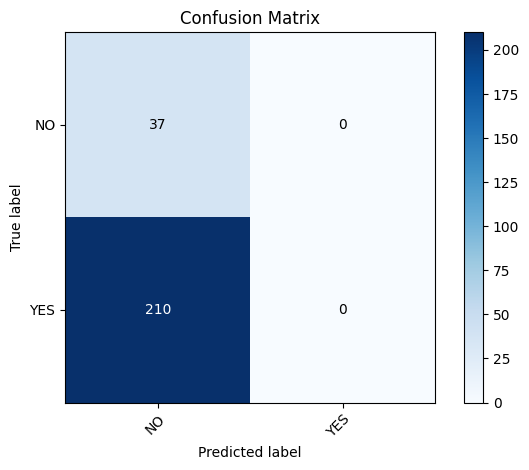

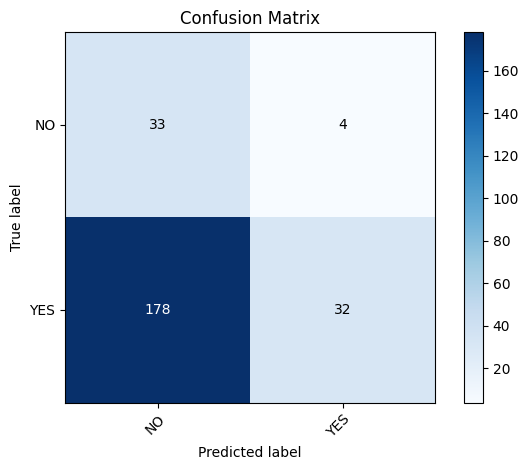

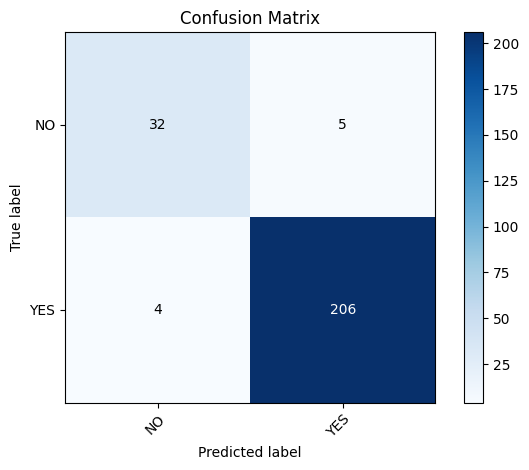

In [58]:
def test(model, x_train, y_train):
  x_train = x_train.to(device)
  y_train = y_train.to(device)
  y_pred = model(x_train)
  ## Comparar los datos predecidor con los datos de entrenamiento

  return y_pred

  ## Graficar la matriz de confusion y mostrar métricas como F1 score, presition and recall

loss_list = train(model1, loss, optimizer, 1000, x_train_tensor, y_train_tensor)
y_pred1 = test(model1, x_train_tensor, y_train_tensor)


loss_list = train(model2, loss, optimizer, 1000, x_train_tensor, y_train_tensor)
y_pred2 = test(model2, x_train_tensor, y_train_tensor)

loss_list = train(model3, loss, optimizer, 1000, x_train_tensor, y_train_tensor)
y_pred3 = test(model3, x_train_tensor, y_train_tensor)

# Graficar la matriz de confusión
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

plot_confusion_matrix(y_train_tensor.cpu().numpy(), y_pred1.argmax(dim=1).cpu().numpy(), ['NO', 'YES'])
plot_confusion_matrix(y_train_tensor.cpu().numpy(), y_pred2.argmax(dim=1).cpu().numpy(), ['NO', 'YES'])
plot_confusion_matrix(y_train_tensor.cpu().numpy(), y_pred3.argmax(dim=1).cpu().numpy(), ['NO', 'YES'])
